<a href="https://colab.research.google.com/github/jbtuku/Data-Gathering/blob/main/Dataintegration/integration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import files
import pandas as pd


uploaded = files.upload()


cases_df = pd.read_csv("covid_confirmed_usafacts.csv")
deaths_df = pd.read_csv("covid_deaths_usafacts.csv")
census_df = pd.read_csv("acs2017_county_data.csv")


target_date = '2023-07-23'
cases_df = cases_df[['County Name', 'State', target_date]].copy()
deaths_df = deaths_df[['County Name', 'State', target_date]].copy()


census_df = census_df[['County', 'State', 'TotalPop', 'IncomePerCap', 'Poverty', 'Unemployment']].copy()


print(" cases_df columns:", list(cases_df.columns))
print(" deaths_df columns:", list(deaths_df.columns))
print(" census_df columns:", list(census_df.columns))


Saving acs2017_county_data.csv to acs2017_county_data (5).csv
Saving covid_confirmed_usafacts.csv to covid_confirmed_usafacts (4).csv
Saving covid_deaths_usafacts.csv to covid_deaths_usafacts (4).csv
 cases_df columns: ['County Name', 'State', '2023-07-23']
 deaths_df columns: ['County Name', 'State', '2023-07-23']
 census_df columns: ['County', 'State', 'TotalPop', 'IncomePerCap', 'Poverty', 'Unemployment']


In [7]:

cases_df['County Name'] = cases_df['County Name'].str.strip()
deaths_df['County Name'] = deaths_df['County Name'].str.strip()


cases_match = cases_df[cases_df['County Name'] == "Washington County"]
deaths_match = deaths_df[deaths_df['County Name'] == "Washington County"]


print(" Washington County in cases_df:", len(cases_match))
print(" Washington County in deaths_df:", len(deaths_match))


 Washington County in cases_df: 30
 Washington County in deaths_df: 30


In [9]:

cases_df = cases_df[cases_df['County Name'] != 'Statewide Unallocated']
deaths_df = deaths_df[deaths_df['County Name'] != 'Statewide Unallocated']


print(" Rows remaining in cases_df:", len(cases_df))
print(" Rows remaining in deaths_df:", len(deaths_df))



 Rows remaining in cases_df: 3142
 Rows remaining in deaths_df: 3142


In [10]:

us_state_to_abbrev = {
    "Alabama": "AL", "Alaska": "AK", "Arizona": "AZ", "Arkansas": "AR",
    "California": "CA", "Colorado": "CO", "Connecticut": "CT", "Delaware": "DE",
    "Florida": "FL", "Georgia": "GA", "Hawaii": "HI", "Idaho": "ID",
    "Illinois": "IL", "Indiana": "IN", "Iowa": "IA", "Kansas": "KS",
    "Kentucky": "KY", "Louisiana": "LA", "Maine": "ME", "Maryland": "MD",
    "Massachusetts": "MA", "Michigan": "MI", "Minnesota": "MN", "Mississippi": "MS",
    "Missouri": "MO", "Montana": "MT", "Nebraska": "NE", "Nevada": "NV",
    "New Hampshire": "NH", "New Jersey": "NJ", "New Mexico": "NM", "New York": "NY",
    "North Carolina": "NC", "North Dakota": "ND", "Ohio": "OH", "Oklahoma": "OK",
    "Oregon": "OR", "Pennsylvania": "PA", "Rhode Island": "RI", "South Carolina": "SC",
    "South Dakota": "SD", "Tennessee": "TN", "Texas": "TX", "Utah": "UT",
    "Vermont": "VT", "Virginia": "VA", "Washington": "WA", "West Virginia": "WV",
    "Wisconsin": "WI", "Wyoming": "WY", "District of Columbia": "DC",
    "American Samoa": "AS", "Guam": "GU", "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR", "United States Minor Outlying Islands": "UM",
    "Virgin Islands, U.S.": "VI",
}


abbrev_to_us_state = dict(map(reversed, us_state_to_abbrev.items()))


cases_df['State'] = cases_df['State'].map(abbrev_to_us_state)
deaths_df['State'] = deaths_df['State'].map(abbrev_to_us_state)

cases_df.head()


,County Name,State,2023-07-23
1,Autauga County,Alabama,19913
2,Baldwin County,Alabama,70521
3,Barbour County,Alabama,7582
4,Bibb County,Alabama,8149
5,Blount County,Alabama,18872


In [11]:

cases_df['key'] = cases_df['County Name'] + ", " + cases_df['State']
deaths_df['key'] = deaths_df['County Name'] + ", " + deaths_df['State']
census_df['key'] = census_df['County'] + ", " + census_df['State']


cases_df = cases_df.set_index('key')
deaths_df = deaths_df.set_index('key')
census_df = census_df.set_index('key')


census_df.head()


,County,State,TotalPop,IncomePerCap,Poverty,Unemployment
key,,,,,,
"Autauga County, Alabama",Autauga County,Alabama,55036,27824,13.7,5.2
"Baldwin County, Alabama",Baldwin County,Alabama,203360,29364,11.8,5.5
"Barbour County, Alabama",Barbour County,Alabama,26201,17561,27.2,12.4
"Bibb County, Alabama",Bibb County,Alabama,22580,20911,15.2,8.2
"Blount County, Alabama",Blount County,Alabama,57667,22021,15.6,4.9


In [12]:

cases_df = cases_df.rename(columns={'2023-07-23': 'Cases'})
deaths_df = deaths_df.rename(columns={'2023-07-23': 'Deaths'})

print(" cases_df columns:", cases_df.columns.values.tolist())
print(" deaths_df columns:", deaths_df.columns.values.tolist())


 cases_df columns: ['County Name', 'State', 'Cases']
 deaths_df columns: ['County Name', 'State', 'Deaths']


In [13]:
print("cases_df index name:", cases_df.index.name)
print("deaths_df index name:", deaths_df.index.name)
print("census_df index name:", census_df.index.name)


cases_df index name: key
deaths_df index name: key
census_df index name: key


In [14]:

join_df = cases_df.join(deaths_df[['Deaths']])


join_df = join_df.join(census_df[['TotalPop', 'IncomePerCap', 'Poverty', 'Unemployment']])


join_df['CasesPerCap'] = join_df['Cases'] / join_df['TotalPop']
join_df['DeathsPerCap'] = join_df['Deaths'] / join_df['TotalPop']


print(" Total rows in join_df:", len(join_df))

join_df.head()


 Total rows in join_df: 3142


,County Name,State,Cases,Deaths,TotalPop,IncomePerCap,Poverty,Unemployment,CasesPerCap,DeathsPerCap
key,,,,,,,,,,
"Autauga County, Alabama",Autauga County,Alabama,19913,235,55036.0,27824.0,13.7,5.2,0.361818,0.004270
"Baldwin County, Alabama",Baldwin County,Alabama,70521,731,203360.0,29364.0,11.8,5.5,0.346779,0.003595
"Barbour County, Alabama",Barbour County,Alabama,7582,104,26201.0,17561.0,27.2,12.4,0.289378,0.003969
"Bibb County, Alabama",Bibb County,Alabama,8149,111,22580.0,20911.0,15.2,8.2,0.360895,0.004916
"Blount County, Alabama",Blount County,Alabama,18872,261,57667.0,22021.0,15.6,4.9,0.327258,0.004526


In [15]:

correlation_matrix = join_df.corr(numeric_only=True)


correlation_matrix


,Cases,Deaths,TotalPop,IncomePerCap,Poverty,Unemployment,CasesPerCap,DeathsPerCap
Cases,1.000000,0.949542,0.969875,0.227857,-0.054318,0.029905,0.059670,-0.121179
Deaths,0.949542,1.000000,0.937218,0.182352,-0.024221,0.053357,0.043140,-0.044544
TotalPop,0.969875,0.937218,1.000000,0.257010,-0.065215,0.029982,0.027721,-0.141002
IncomePerCap,0.227857,0.182352,0.257010,1.000000,-0.726084,-0.472206,-0.047503,-0.439319
Poverty,-0.054318,-0.024221,-0.065215,-0.726084,1.000000,0.652944,0.098643,0.378731
Unemployment,0.029905,0.053357,0.029982,-0.472206,0.652944,1.000000,0.070755,0.240358
CasesPerCap,0.059670,0.043140,0.027721,-0.047503,0.098643,0.070755,1.000000,0.180533
DeathsPerCap,-0.121179,-0.044544,-0.141002,-0.439319,0.378731,0.240358,0.180533,1.000000


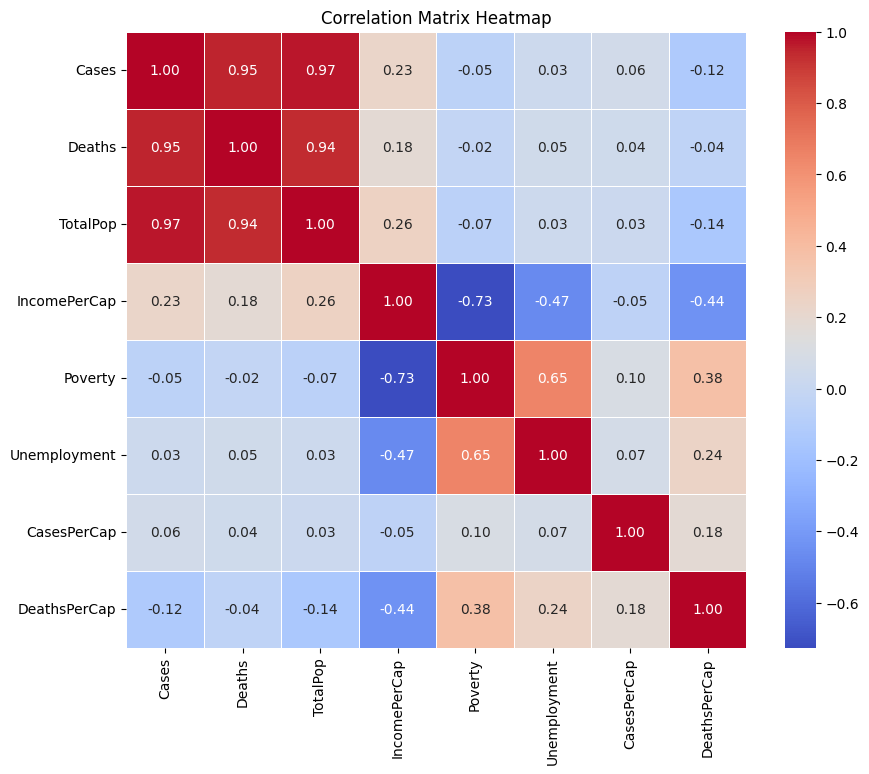

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt


correlation_matrix = join_df.corr(numeric_only=True)


plt.figure(figsize=(10, 8))


sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)


plt.title('Correlation Matrix Heatmap')


plt.show()
